In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:40px;"> Real State Website Data Analysis </h1> 

* <h1><a href="#desc" style="color: #696969; text-decoration: none;">Description</a></h1>
* <h1><a href="#imp" style="color: #696969; text-decoration: none;">Import libliries</a></h1>
* <h1><a href="#eda" style="color: #696969; text-decoration: none;">EDA</a></h1>
- <h2><a href="#preview" style="color: #696969; text-decoration: none; margin-left:50px;">Preview</a>
- <h2><a href="#manual" style="color: #696969; text-decoration: none; margin-left:50px;">Data recovery and cleaning</a>
* <h1><a href="#visual" style="color: #696969; text-decoration: none;">Visualisation</a></h1>
* <h1><a href="#line" style="color: #696969; text-decoration: none;">Linear Regression</a></h1>
* <h1><a href="#conc" style="color: #696969; text-decoration: none;">Conclusion</a></h1>

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:40px;" id="desc"> Description </h1> 

This CSV dataset provides comprehensive information about house prices. It consists of 9,819 entries and 54 columns, offering a wealth of features for analysis. The dataset includes various numerical and categorical variables, providing insights into factors that influence house prices.

The key columns in the dataset are as follows:

* Location: The location of the houses.
* Year: The year of construction.
* Type: The type of the house.
* Bedrooms: The number of bedrooms in the house.
* Bathrooms: The number of bathrooms in the house.
* Size_in_SqYds: The size of the house in square yards.
* Price: The price of the house.
* Parking_Spaces: The number of parking spaces available.
* Floors_in_Building: The number of floors in the building.
* Elevators: The presence of elevators in the building.
* Lobby_in_Building: The presence of a lobby in the building.

In addition to these, the dataset contains several other features related to various amenities and facilities available in the houses, such as double-glazed windows, central air conditioning, central heating, waste disposal, furnished status, service elevators, and more.

By performing exploratory data analysis on this dataset using Python and the Pandas library, valuable insights can be gained regarding the relationships between different variables and the impact they have on house prices. Descriptive statistics, data visualization, and feature engineering techniques can be applied to uncover patterns and trends in the housing market.

This dataset serves as a valuable resource for real estate professionals, analysts, and researchers interested in understanding the factors that contribute to house prices and making informed decisions in the real estate market.

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:40px;" id="imp"> Import libliries </h1> 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:40px;" id="eda"> EDA </h1> 

In [4]:
data = pd.read_csv('data.csv', index_col='Ids')

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:30px;" id="preview"> Preview </h1> 

In [5]:
data.head()

,Location1,Location2,Type,Bedrooms,Bathrooms,Size_in_SqYds,Price_in_millions,Built_in_year,Parking_Spaces,Floors_in_Building,...,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled
Ids,,,,,,,,,,,,,,,,,,,,,
0,"DHA Phase 6, DHA Defence",DHA Defence,House,6.0,6.0,600.0,220.0,NaN,3,NaN,...,0,0,0,0,0,0,0,0,0,0
1,"Saadi Town - Block 3, Saadi Town, Scheme 33",Scheme 33,House,6.0,6.0,240.0,38.5,NaN,1,NaN,...,0,0,0,0,0,0,0,0,0,0
2,"Bahria Town - Precinct 19, Bahria Town Karachi",Bahria Town Karachi,Flat,2.0,2.0,106.0,7.2,2023-01-01,2,10.0,...,0,0,0,0,0,0,0,0,0,0
3,"Askari 5 - Sector J, Askari 5, Malir Cantonmen...",Cantt,House,5.0,5.0,375.0,72.5,2022-01-01,4,NaN,...,0,0,0,0,0,0,0,0,0,0
4,"Bahria Town - Precinct 35, Bahria Sports City,...",Bahria Town Karachi,House,4.0,4.0,350.0,21.1,NaN,1,NaN,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14202 entries, 0 to 16143
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Location1                                  14202 non-null  object 
 1   Location2                                  13935 non-null  object 
 2   Type                                       14202 non-null  object 
 3   Bedrooms                                   12602 non-null  float64
 4   Bathrooms                                  12343 non-null  float64
 5   Size_in_SqYds                              13935 non-null  float64
 6   Price_in_millions                          14201 non-null  float64
 7   Built_in_year                              2546 non-null   object 
 8   Parking_Spaces                             14202 non-null  int64  
 9   Floors_in_Building                         1413 non-null   float64
 10  Elevators             

In [7]:
data.describe()

,Bedrooms,Bathrooms,Size_in_SqYds,Price_in_millions,Parking_Spaces,Floors_in_Building,Elevators,Store_Rooms,Lobby_in_Building,Double_Glazed_Windows,...,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled
count,12602.000000,12343.000000,13935.000000,14201.000000,14202.000000,1413.000000,1676.000000,0.0,14202.000000,14202.000000,...,14202.000000,14202.000000,14202.000000,14202.000000,14202.000000,14202.000000,14202.000000,14202.000000,14202.000000,14202.000000
mean,3.739327,3.874909,259.141084,44.587785,1.271793,11.297948,2.376492,NaN,0.144205,0.211308,...,0.180327,0.181453,0.177651,0.157091,0.155189,0.109210,0.018589,0.016336,0.001056,0.002324
std,1.517370,1.521755,254.995211,52.221984,16.786646,10.082154,1.874803,NaN,0.351310,0.408251,...,0.384473,0.385407,0.382232,0.363899,0.362098,0.311913,0.135073,0.126768,0.032483,0.048150
min,1.000000,1.000000,28.000000,0.690000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,120.000000,14.000000,0.000000,4.000000,2.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,200.000000,27.000000,0.000000,8.000000,2.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,5.000000,350.000000,65.000000,1.000000,14.000000,3.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,10.000000,20000.000000,850.000000,1000.000000,48.000000,44.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:30px;" id="manual"> Data recovery and cleaning</h1> 

In [8]:
data = data.drop(['Built_in_year', 'Elevators', 'Floors_in_Building', 'Store_Rooms'], axis=1)

In [9]:
data.loc[data['Bedrooms'].isnull(), 'Bedrooms']=data['Bedrooms'].median()
data.loc[data['Bathrooms'].isnull(), 'Bathrooms']=data['Bathrooms'].median()
data['Location2'] = data['Location2'].fillna('none')

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">To fill in the missing values in the area of the houses, we will calculate the median of the area of one room. </p>

In [10]:
(data['Size_in_SqYds'] / data['Bedrooms']).median()

64.66666666666667

In [11]:
data.loc[data['Size_in_SqYds'].isnull(), 'Size_in_SqYds'] = data.loc[data['Size_in_SqYds'].isnull(), 'Bedrooms']*65

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">
We will do the same with the price, we will start from the area</p>

In [12]:
(data['Price_in_millions']/data['Size_in_SqYds']).median()

0.13

In [13]:
data.loc[data['Price_in_millions'].isnull(), 'Price_in_millions'] = data.loc[data['Price_in_millions'].isnull(), 'Size_in_SqYds']*0.13

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14202 entries, 0 to 16143
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Location1                                  14202 non-null  object 
 1   Location2                                  14202 non-null  object 
 2   Type                                       14202 non-null  object 
 3   Bedrooms                                   14202 non-null  float64
 4   Bathrooms                                  14202 non-null  float64
 5   Size_in_SqYds                              14202 non-null  float64
 6   Price_in_millions                          14202 non-null  float64
 7   Parking_Spaces                             14202 non-null  int64  
 8   Lobby_in_Building                          14202 non-null  int64  
 9   Double_Glazed_Windows                      14202 non-null  int64  
 10  Central_Air_Conditioni

In [16]:
data.isnull().sum()

Location1                                    0
Location2                                    0
Type                                         0
Bedrooms                                     0
Bathrooms                                    0
Size_in_SqYds                                0
Price_in_millions                            0
Parking_Spaces                               0
Lobby_in_Building                            0
Double_Glazed_Windows                        0
Central_Air_Conditioning                     0
Central_Heating                              0
Waste_Disposal                               0
Furnished                                    0
Service_Elevators_in_Building                0
Flooring                                     0
Electricity_Backup                           0
Servant_Quarters                             0
Study_Room                                   0
Prayer_Room                                  0
Powder_Room                                  0
Gym          

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;"> Good job! </p>

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:40px;" id="visual"> Visualisation </h1> 

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">I'm assuming that Location2 is the district, so let's calculate the most prestigious district </p>

In [17]:
most_exp_areas = data.groupby('Location2', as_index=False).agg({'Price_in_millions':'median'}).sort_values(by=['Price_in_millions'], ascending=False).head(10)

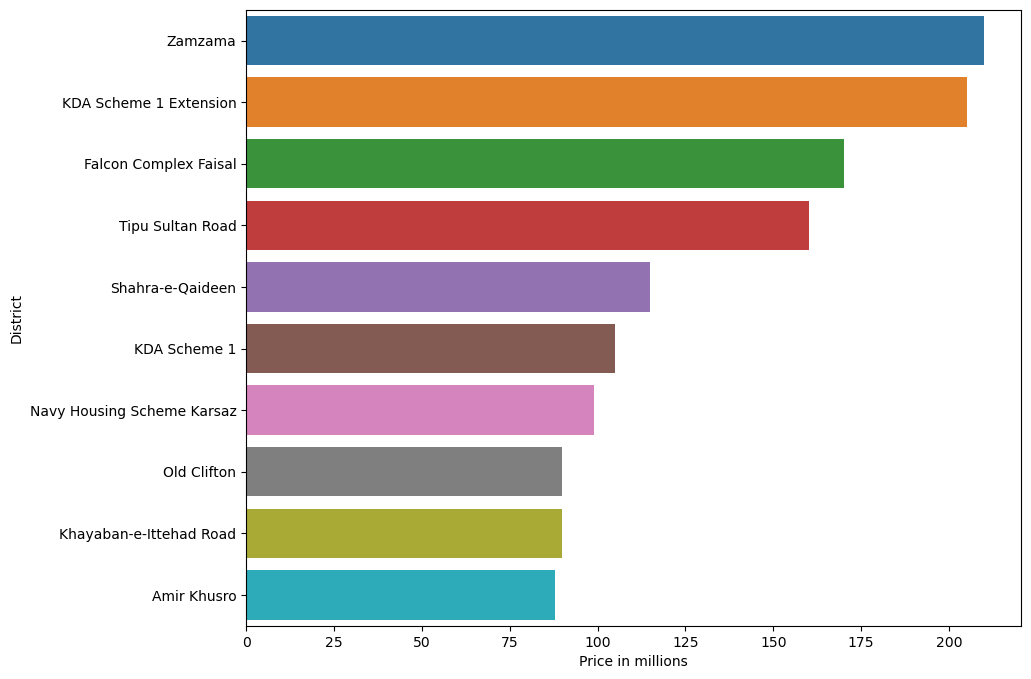

In [18]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=most_exp_areas, y='Location2', x='Price_in_millions')
plt.xlabel('Price in millions')
plt.ylabel('District')
plt.show()

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">
Location1 - most likely settlement, calculate the most prestigious</p>

In [19]:
most_exp_address = data.groupby('Location1', as_index=False).agg({'Price_in_millions':'median'}).sort_values(by=['Price_in_millions'], ascending=False).head(10)

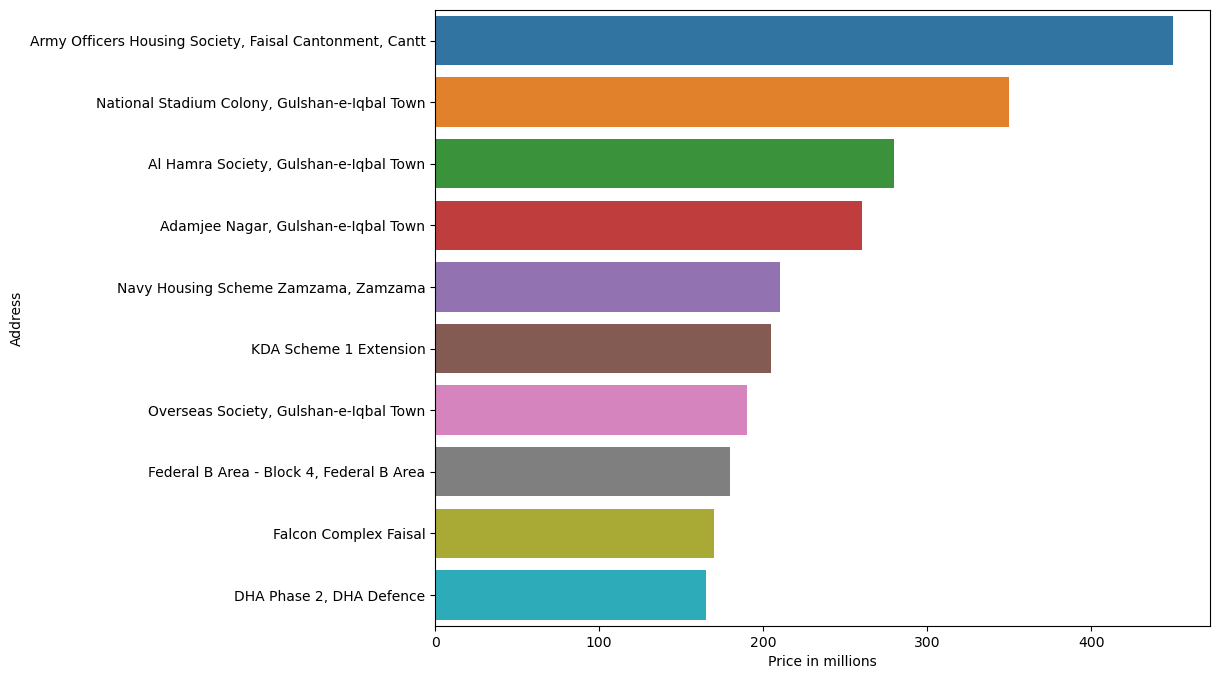

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=most_exp_address, y='Location1', x='Price_in_millions')
plt.xlabel('Price in millions')
plt.ylabel('Address')
plt.show()

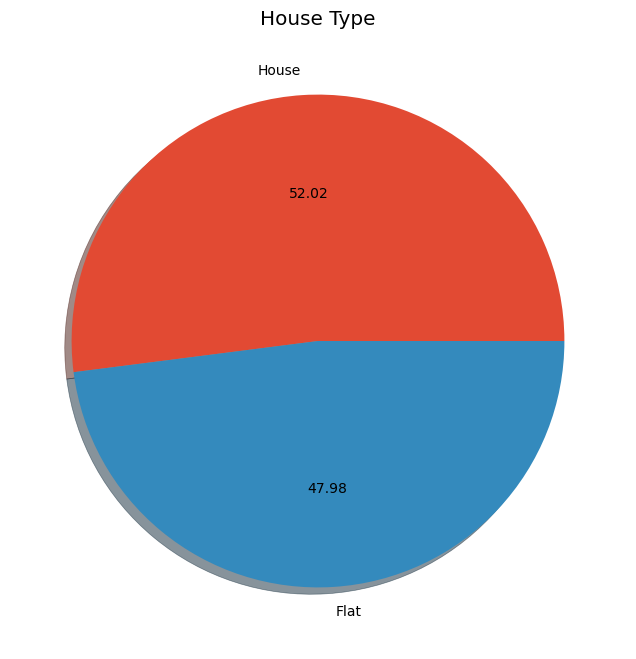

In [21]:
house_type = data['Type'].value_counts()
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.title('House Type')
plt.pie(data=house_type, x=house_type.values, labels=house_type.index, autopct='%.2f', shadow=True)
plt.show()

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">
Let's take a look at the correlation to build new dependency graphs. We will return to this chart. </p>

C:\Users\Asus\AppData\Local\Temp\ipykernel_42212\745443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues')


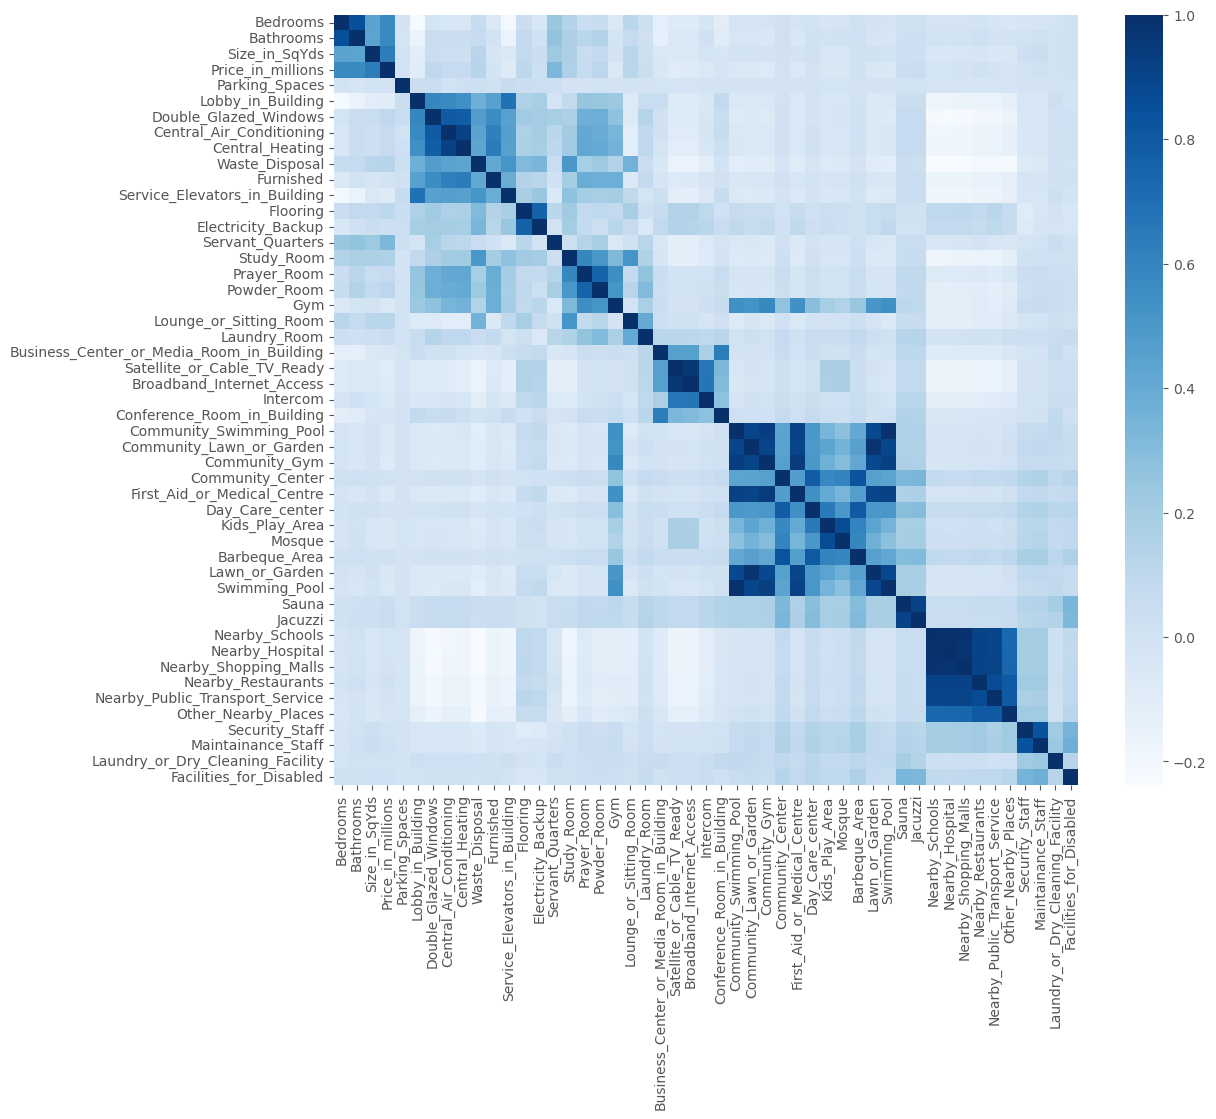

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">
Let's build dependency graphs</p>

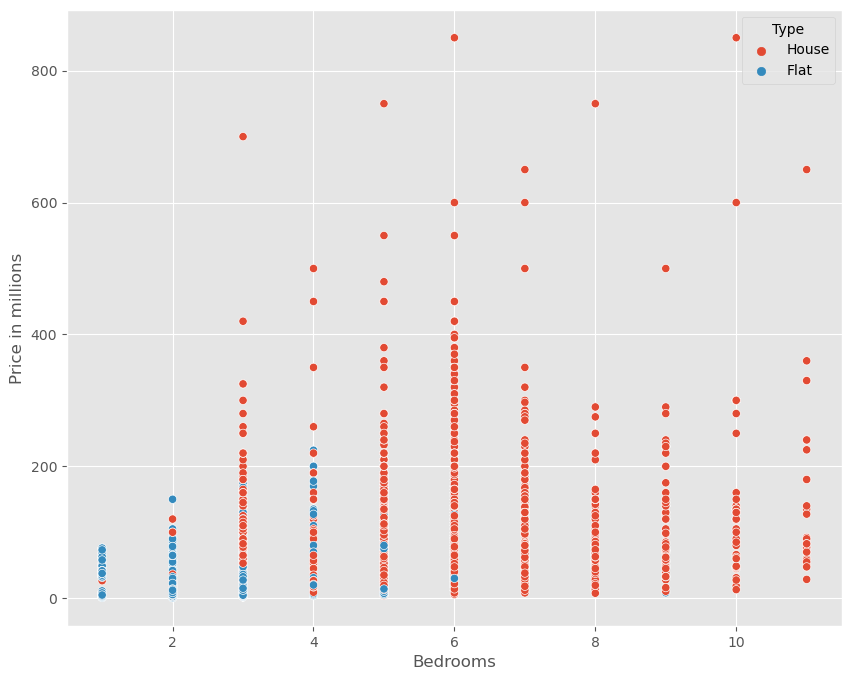

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, y='Price_in_millions', x='Bedrooms', hue='Type')
plt.ylabel('Price in millions')
plt.show()

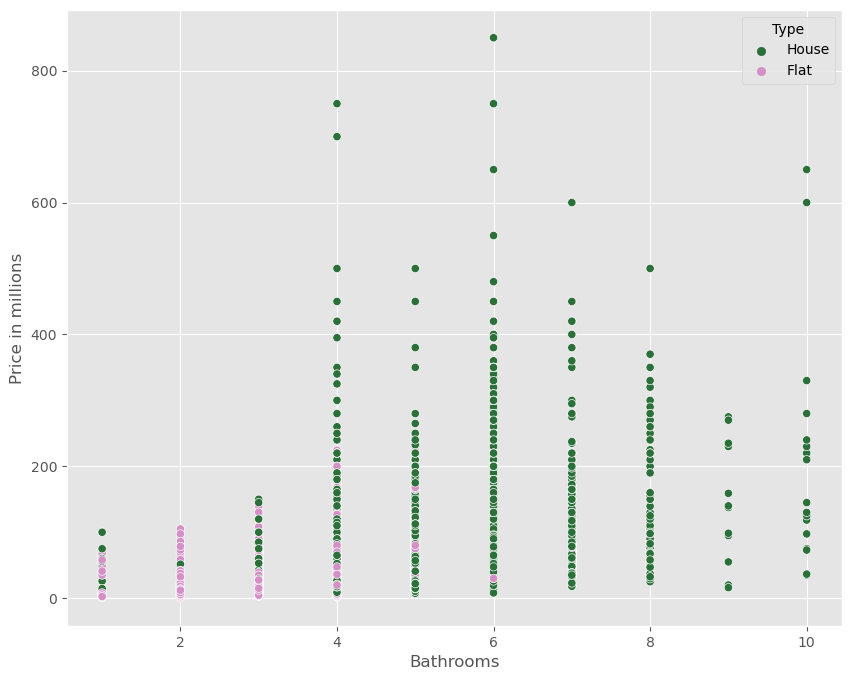

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, y='Price_in_millions', x='Bathrooms', hue='Type', palette='cubehelix')
plt.ylabel('Price in millions')
plt.show()

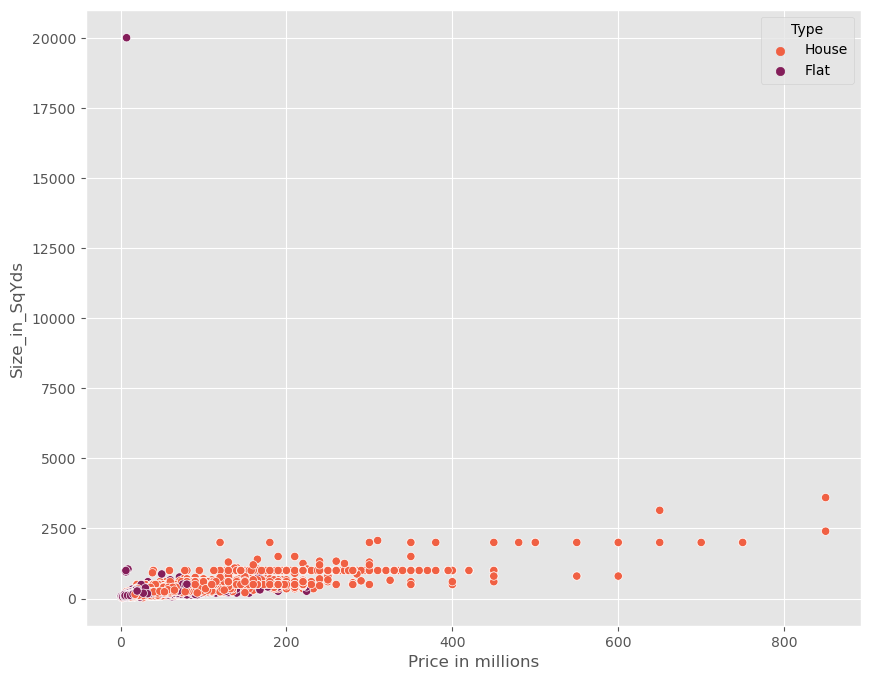

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Price_in_millions', y='Size_in_SqYds', hue='Type', palette='rocket_r')
plt.xlabel('Price in millions')
plt.show()

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">We have outliers in the data. Let's build a barplot to see what we have with the data.</p>

<Axes: xlabel='Price_in_millions', ylabel='Size_in_SqYds'>

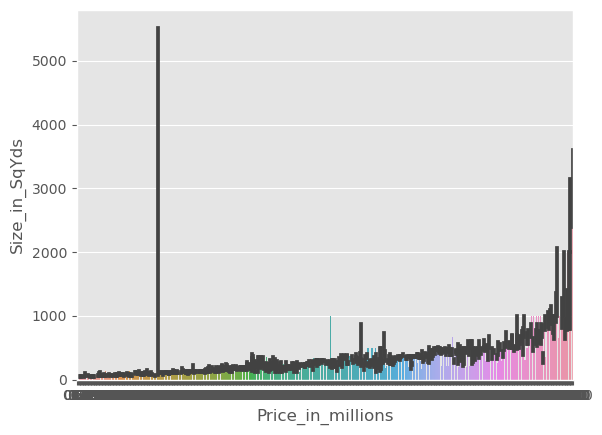

In [26]:
sns.barplot(data=data, x='Price_in_millions', y='Size_in_SqYds')

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">
We have an outlier with a house area of ​​more than 5000 and tails from an area of ​​more than 1000. I think it's worth removing them</p>

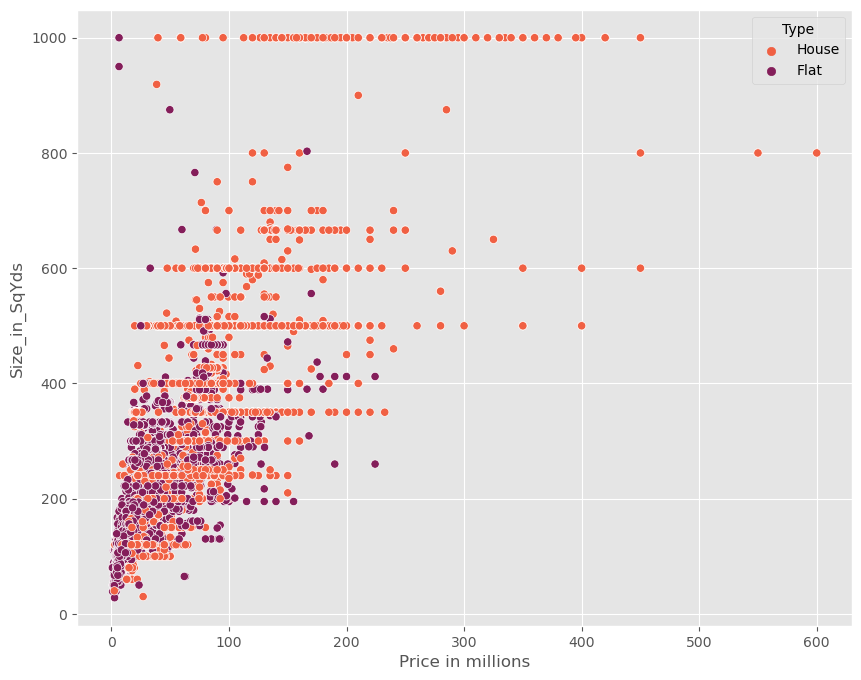

In [27]:
drop_ind = data[data['Size_in_SqYds']>1000].index
data = data.drop(drop_ind)
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Price_in_millions', y='Size_in_SqYds', hue='Type', palette='rocket_r')
plt.xlabel('Price in millions')
plt.show()

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">Now let's translate categorical features into numbers to see the correlation across all data</p>

In [28]:
for c in data.columns:
    if data[c].dtype=='object':
        le = LabelEncoder().fit(list(data[c].values))
        data[c] = le.transform(data[c].values)

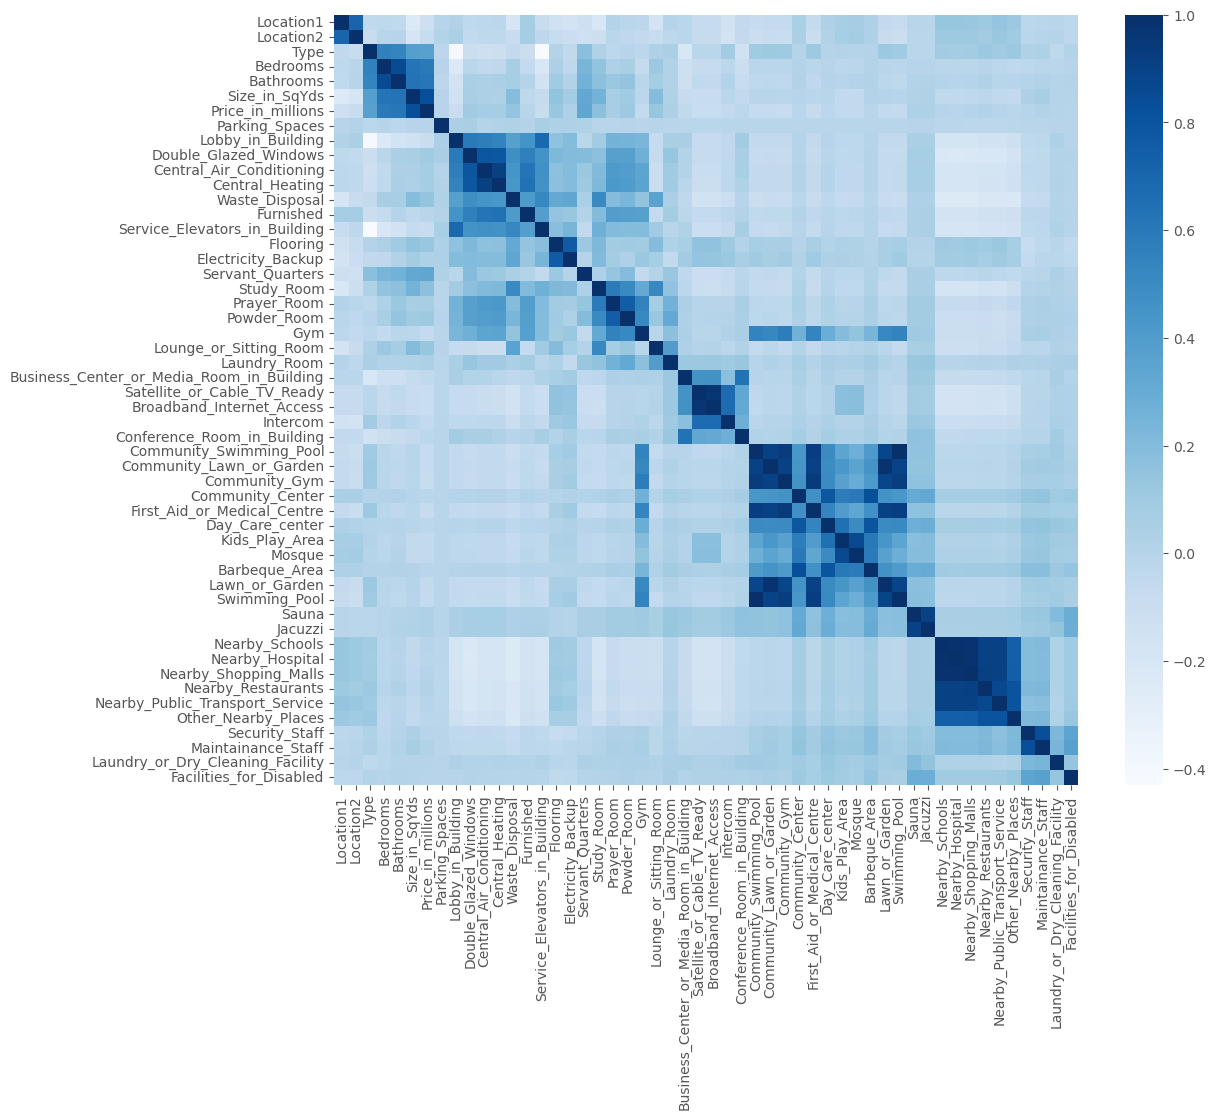

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:40px;" id="line"> Linear Regression</h1> 

In [30]:
target = data['Price_in_millions']
features = data.drop('Price_in_millions', axis=1)

In [31]:
x_test, x_val, y_test, y_val = train_test_split(features, target, random_state=13, test_size=0.35)
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((9200, 51), (4955, 51), (9200,), (4955,))

In [32]:
model = LinearRegression().fit(x_test, y_test)

In [33]:
model.score(x_test, y_test)

0.7151492649653405

In [34]:
model.score(x_val, y_val)

0.7315012115292752

In [35]:
predict = model.predict(x_val)
MSE = mean_squared_error(y_val, predict)
MSE

571.6667068436504

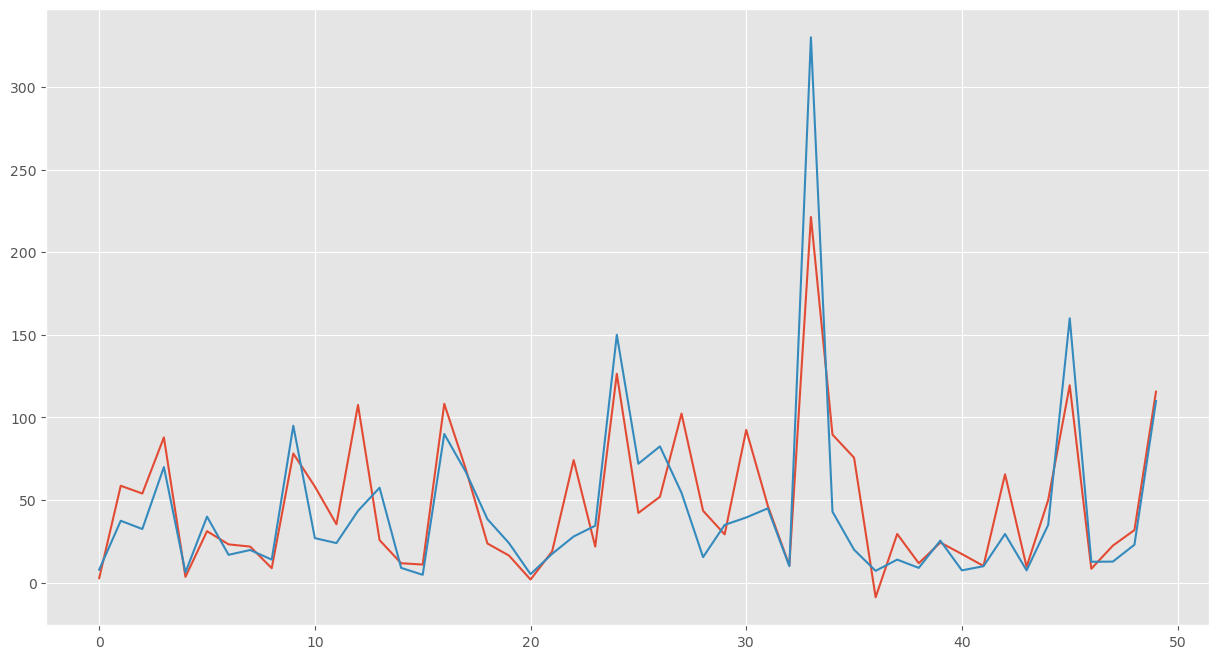

In [36]:
plt.figure(figsize=(15, 8))
plt.plot(range(50), predict[0:50], range(50), y_val[0:50])
plt.show()

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">Not a bad result on the validation data! Let's try to improve the result by selecting only features with a strong correlation. </p>

In [37]:
import_features = data[['Type', 'Bedrooms', 'Bathrooms', 'Size_in_SqYds', 'Servant_Quarters']]
x_test, x_val, y_test, y_val = train_test_split(import_features, target, random_state=13, test_size=0.35)

In [38]:
model = LinearRegression().fit(x_test, y_test)
model.score(x_test, y_test)

0.694379819300557

In [39]:
model.score(x_val, y_val)

0.7191408759170879

In [40]:
predict = model.predict(x_val)
MSE = mean_squared_error(y_val, predict)
MSE

597.983370673483

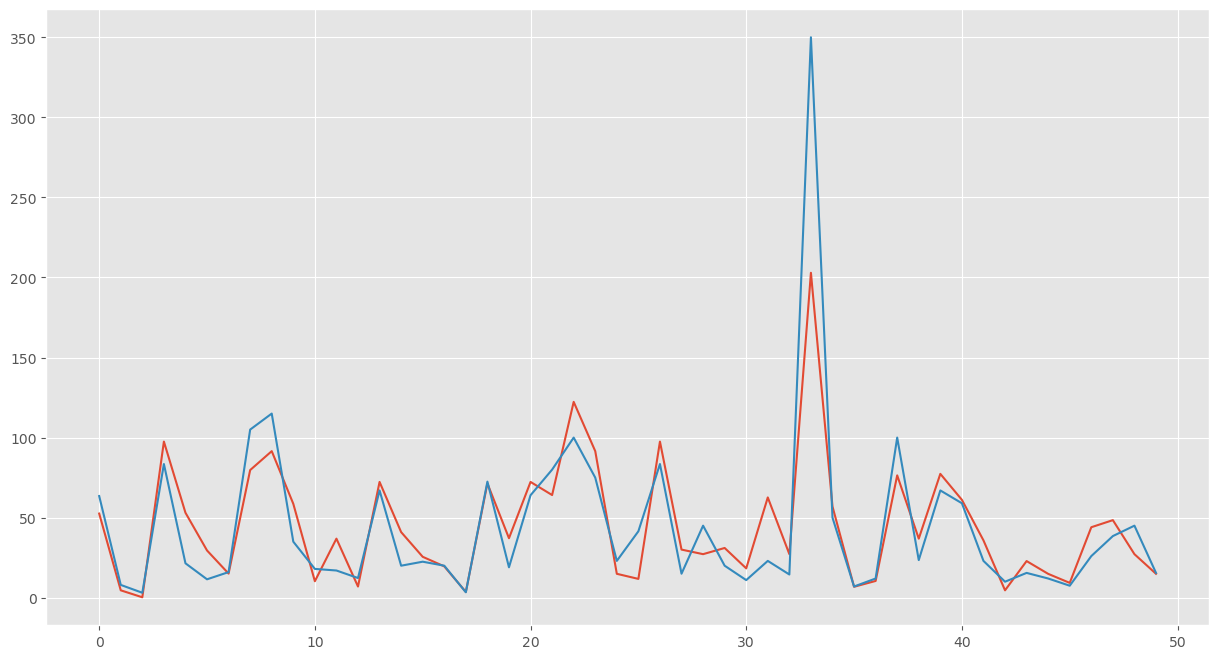

In [41]:
plt.figure(figsize=(15, 8))
plt.plot(range(50), predict[50:100], range(50), y_val[50:100])
plt.show()

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">The result of the model has deteriorated, which may indicate that other features also affect the price.</p>

<h1 align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:40px;" id="conc"> Conclusion </h1> 

<p align='center' style="color: #B5B5B5; background-color: #333333; padding:5px; font-size:20px;">The model says that many already know - most of all, the price of a house depends on the area and number of rooms. The remaining features have less impact, but improve model predictions.</p>
